In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
# generate all matrices and their inverses, since not all matrices can be inverted

In [54]:
np.random.seed(55)
matList = [np.random.randint(0,20, (3,3))]

In [55]:
i = 1
while i < 10501:
  matList.append(np.random.randint(0,20, (3,3)))
  i += 1

In [56]:
len(matList)

8501

In [57]:
invList = []
for x in matList:
    try:
        inverse = np.linalg.inv(x)
        invList.append([x, inverse])
    except np.linalg.LinAlgError:
    # Not invertible. Skip this one.
        pass

In [58]:
len(invList) #the number of matrices that can be inverted

8487

In [59]:
# so we have 1417 out of 1501 matrices

In [60]:
# dont worry about a formula for finding the inverse of a matrix but use 
# linear regression for each element of the inverted matrix as a formula from 
# each element of the original matrix and look for a relationship

In [61]:
#convert to dataframe
df = pd.DataFrame(data=invList)
df.columns = ['original', 'inverse']

In [62]:
for i in [0,1,2]:
    for j in [0,1,2]:
        df['original'+str(i)+str(j)] = df.apply(lambda row: row['original'][i][j], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        df['inverse'+str(i)+str(j)] = df.apply(lambda row: row['inverse'][i][j], axis=1)
df

,original,inverse,original00,original01,original02,original10,original11,original12,original20,original21,original22,inverse00,inverse01,inverse02,inverse10,inverse11,inverse12,inverse20,inverse21,inverse22
0,"[[13, 7, 8], [5, 5, 1], [16, 3, 14]]","[[-2.4814814814814814, 2.740740740740741, 1.22...",13,7,8,5,5,1,16,3,14,-2.481481,2.740741,1.222222,2.000000e+00,-2.000000,-1.000000,2.407407,-2.703704,-1.111111
1,"[[13, 12, 15], [7, 1, 8], [19, 10, 7]]","[[-0.06939163498098859, 0.06273764258555133, 0...",13,12,15,7,1,8,19,10,7,-0.069392,0.062738,0.076996,9.790875e-02,-0.184411,0.000951,0.048479,0.093156,-0.067490
2,"[[0, 11, 13], [18, 17, 16], [14, 10, 9]]","[[0.09722222222222239, -0.4305555555555565, 0....",0,11,13,18,17,16,14,10,9,0.097222,-0.430556,0.625000,-8.611111e-01,2.527778,-3.250000,0.805556,-2.138889,2.750000
3,"[[12, 12, 13], [9, 1, 13], [18, 16, 13]]","[[-0.2777777777777778, 0.07407407407407404, 0....",12,12,13,9,1,13,18,16,13,-0.277778,0.074074,0.203704,1.666667e-01,-0.111111,-0.055556,0.179487,0.034188,-0.136752
4,"[[18, 10, 0], [10, 3, 7], [18, 1, 19]]","[[0.1923076923076924, -0.7307692307692312, 0.2...",18,10,0,10,3,7,18,1,19,0.192308,-0.730769,0.269231,-2.461538e-01,1.315385,-0.484615,-0.169231,0.623077,-0.176923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8482,"[[13, 9, 11], [7, 3, 14], [6, 1, 10]]","[[0.07511737089201877, -0.37089201877934275, 0...",13,9,11,7,3,14,6,1,10,0.075117,-0.370892,0.436620,6.572770e-02,0.300469,-0.492958,-0.051643,0.192488,-0.112676
8483,"[[5, 0, 7], [3, 12, 3], [19, 13, 19]]","[[-0.4999999999999999, -0.2407407407407407, 0....",5,0,7,3,12,3,19,13,19,-0.500000,-0.240741,0.222222,-8.370729e-18,0.100529,-0.015873,0.500000,0.171958,-0.158730
8484,"[[14, 7, 8], [0, 15, 9], [2, 7, 8]]","[[0.08333333333333334, 0.0, -0.083333333333333...",14,7,8,0,15,9,2,7,8,0.083333,0.000000,-0.083333,2.631579e-02,0.140351,-0.184211,-0.043860,-0.122807,0.307018
8485,"[[0, 8, 16], [15, 0, 15], [7, 6, 2]]","[[-0.04411764705882353, 0.0392156862745098, 0....",0,8,16,15,0,15,7,6,2,-0.044118,0.039216,0.058824,3.676471e-02,-0.054902,0.117647,0.044118,0.027451,-0.058824


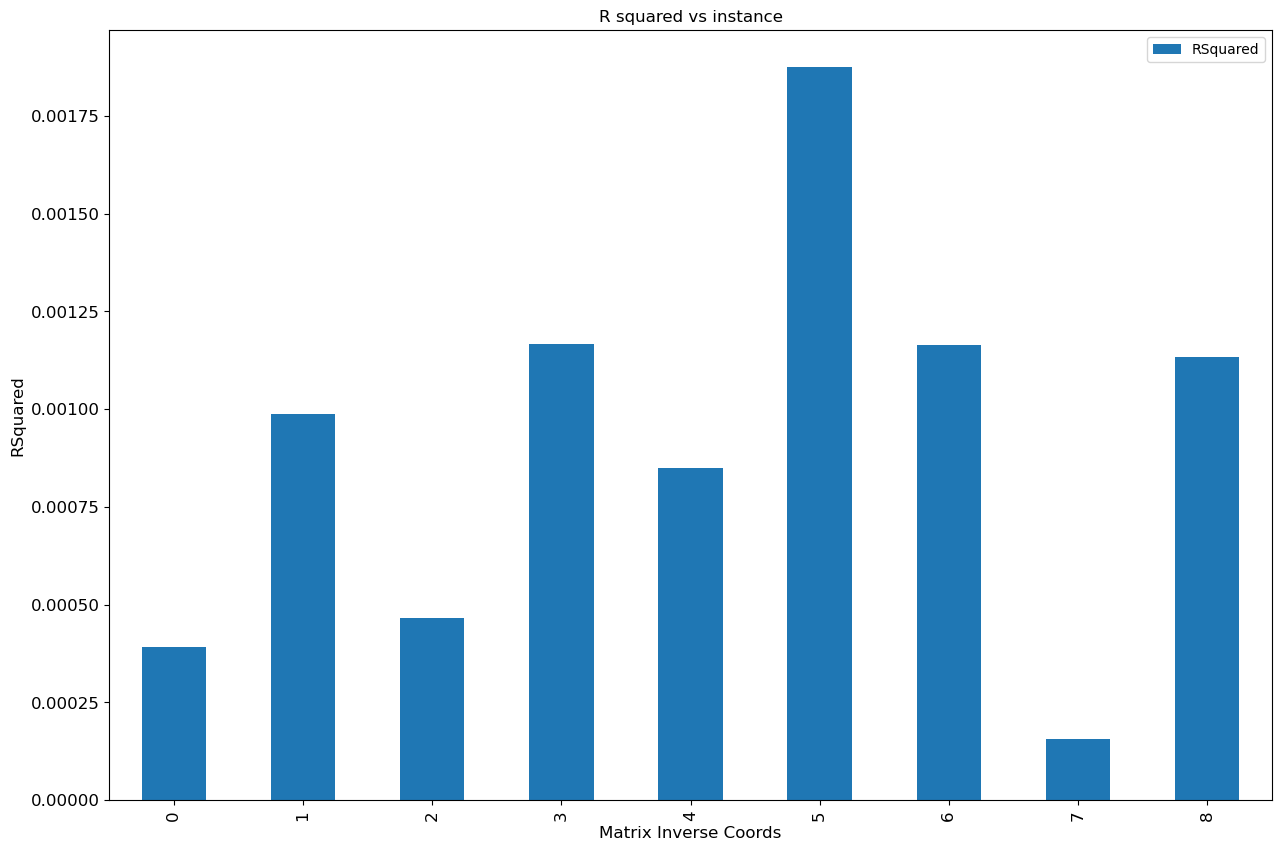

0.0009098041380943957

In [63]:
import statsmodels.api as sm

coords = []
fit = []

dflm = df.copy()

for i in (0,1,2):
    for j in (0,1,2):
        dflm = df.copy()
        y = dflm['inverse'+str(i)+str(j)]
        dflm.drop('original', axis=1, inplace=True)
        dflm.drop('inverse', axis=1, inplace=True)
        dflm.drop('inverse00', axis=1, inplace=True)
        dflm.drop('inverse01', axis=1, inplace=True)
        dflm.drop('inverse02', axis=1, inplace=True)
        dflm.drop('inverse10', axis=1, inplace=True)
        dflm.drop('inverse11', axis=1, inplace=True)
        dflm.drop('inverse12', axis=1, inplace=True)
        dflm.drop('inverse20', axis=1, inplace=True)
        dflm.drop('inverse21', axis=1, inplace=True)
        dflm.drop('inverse22', axis=1, inplace=True)
        X = dflm[dflm.columns]
        X_withconstant = X
        lm = sm.OLS(y,X_withconstant)
        fit.append([ str(i)+" "+str(j),lm.fit().rsquared])
        
import matplotlib.pyplot as plt
ax = pd.DataFrame(fit, columns=['Matrix Inverse Coords', 'RSquared']).plot(kind='bar', title ="R squared vs instance", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Matrix Inverse Coords", fontsize=12)
ax.set_ylabel("RSquared", fontsize=12)
plt.show()

pd.DataFrame(fit, columns=['Matrix Inverse Coords', 'RSquared']).loc[:, 'RSquared'].mean()

In [64]:
#the first corner of the inverse matrix does not have a linear relationship with other components

In [65]:
df = pd.DataFrame(data=invList)
df.columns = ['original', 'inverse']

for i in [0,1,2]:
    for j in [0,1,2]:
        df['original'+str(i)+str(j)] = df.apply(lambda row: row['original'][i][j], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        df['inverse'+str(i)+str(j)] = df.apply(lambda row: row['inverse'][i][j], axis=1)

dflm = df.copy()
y = dflm['inverse01']
dflm.drop('inverse00', axis=1, inplace=True)
dflm.drop('inverse01', axis=1, inplace=True)
dflm.drop('inverse02', axis=1, inplace=True)
dflm.drop('inverse10', axis=1, inplace=True)
dflm.drop('inverse11', axis=1, inplace=True)
dflm.drop('inverse12', axis=1, inplace=True)
dflm.drop('inverse20', axis=1, inplace=True)
dflm.drop('inverse21', axis=1, inplace=True)
dflm.drop('inverse22', axis=1, inplace=True)
dflm.drop('original', axis=1, inplace=True)
dflm.drop('inverse', axis=1, inplace=True)
X = dflm[dflm.columns]
X_withconstant = X
lm_00 = sm.OLS(y,X_withconstant)
lm_00_results = lm_00.fit()
lm_00_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              inverse01   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):             -0.000
Method:                 Least Squares   F-statistic:                             0.9308
Date:                Fri, 19 Jan 2024   Prob (F-statistic):                       0.497
Time:                        06:21:53   Log-Likelihood:                     -2.9196e+05
No. Observations:                8487   AIC:                                  5.839e+05
Df Residuals:                    8478   BIC:                                  5.840e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
original00  -2.49e+11   3.77e+11     -0.660      0.509   -9.88e+11     4.9e+11
original01  2.303e+11   3.76e+11      0.612      0.541   -5.07e+11    9.68e+11
original02  9.339e+11   3.77e+11      2.477      0.013    1.95e+11    1.67e+12
original10 -3.701e+11   3.75e+11     -0.987      0.324   -1.11e+12    3.65e+11
original11 -1.808e+11   3.75e+11     -0.482      0.630   -9.16e+11    5.55e+11
original12 -1.261e+11   3.75e+11     -0.336      0.737   -8.61e+11    6.09e+11
original20 -2.851e+11   3.78e+11     -0.755      0.450   -1.03e+12    4.55e+11
original21   2.13e+11   3.78e+11      0.564      0.573   -5.28e+11    9.54e+11
original22 -5.999e+10   3.73e+11     -0.161      0.872   -7.92e+11    6.72e+11
==============================================================================
Omnibus:                    30654.275   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      14003315500.788
Skew:                          74.043   Prob(JB):                         0.00
Kurtosis:                    6294.058   Cond. No.                         5.15
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
# inverse 1 0 coefficients for linear regression are quite unreasonable

In [67]:
# consider linear combinations of multipying all combinations of two items

dflm = pd.DataFrame(data=invList)
dflm.columns = ['original', 'inverse']

for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['inverse'+str(i)+str(j)] = dflm.apply(lambda row: row['inverse'][i][j], axis=1)

        

for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original00x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][0][0], axis=1)
dflm = dflm.drop('original00x00', axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original01x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][0][1], axis=1)
dflm = dflm.drop('original01x01', axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original02x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][0][2], axis=1)
dflm = dflm.drop('original02x02', axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original10x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][1][0], axis=1)
dflm = dflm.drop('original10x10', axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original11x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][1][1], axis=1)
dflm = dflm.drop('original11x11', axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original12x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][1][2], axis=1)
dflm = dflm.drop('original12x12', axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original20x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][2][0], axis=1)
dflm = dflm.drop('original20x20', axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original21x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][2][1], axis=1)
dflm = dflm.drop('original21x21', axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original22x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][2][2], axis=1)
dflm = dflm.drop('original22x22', axis=1)
  

In [68]:
dflm

,original,inverse,original00,original01,original02,original10,original11,original12,original20,original21,...,original21x20,original21x22,original22x00,original22x01,original22x02,original22x10,original22x11,original22x12,original22x20,original22x21
0,"[[13, 7, 8], [5, 5, 1], [16, 3, 14]]","[[-2.4814814814814814, 2.740740740740741, 1.22...",13,7,8,5,5,1,16,3,...,48,42,182,98,112,70,70,14,224,42
1,"[[13, 12, 15], [7, 1, 8], [19, 10, 7]]","[[-0.06939163498098859, 0.06273764258555133, 0...",13,12,15,7,1,8,19,10,...,190,70,91,84,105,49,7,56,133,70
2,"[[0, 11, 13], [18, 17, 16], [14, 10, 9]]","[[0.09722222222222239, -0.4305555555555565, 0....",0,11,13,18,17,16,14,10,...,140,90,0,99,117,162,153,144,126,90
3,"[[12, 12, 13], [9, 1, 13], [18, 16, 13]]","[[-0.2777777777777778, 0.07407407407407404, 0....",12,12,13,9,1,13,18,16,...,288,208,156,156,169,117,13,169,234,208
4,"[[18, 10, 0], [10, 3, 7], [18, 1, 19]]","[[0.1923076923076924, -0.7307692307692312, 0.2...",18,10,0,10,3,7,18,1,...,18,19,342,190,0,190,57,133,342,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8482,"[[13, 9, 11], [7, 3, 14], [6, 1, 10]]","[[0.07511737089201877, -0.37089201877934275, 0...",13,9,11,7,3,14,6,1,...,6,10,130,90,110,70,30,140,60,10
8483,"[[5, 0, 7], [3, 12, 3], [19, 13, 19]]","[[-0.4999999999999999, -0.2407407407407407, 0....",5,0,7,3,12,3,19,13,...,247,247,95,0,133,57,228,57,361,247
8484,"[[14, 7, 8], [0, 15, 9], [2, 7, 8]]","[[0.08333333333333334, 0.0, -0.083333333333333...",14,7,8,0,15,9,2,7,...,14,56,112,56,64,0,120,72,16,56
8485,"[[0, 8, 16], [15, 0, 15], [7, 6, 2]]","[[-0.04411764705882353, 0.0392156862745098, 0....",0,8,16,15,0,15,7,6,...,42,12,0,16,32,30,0,30,14,12


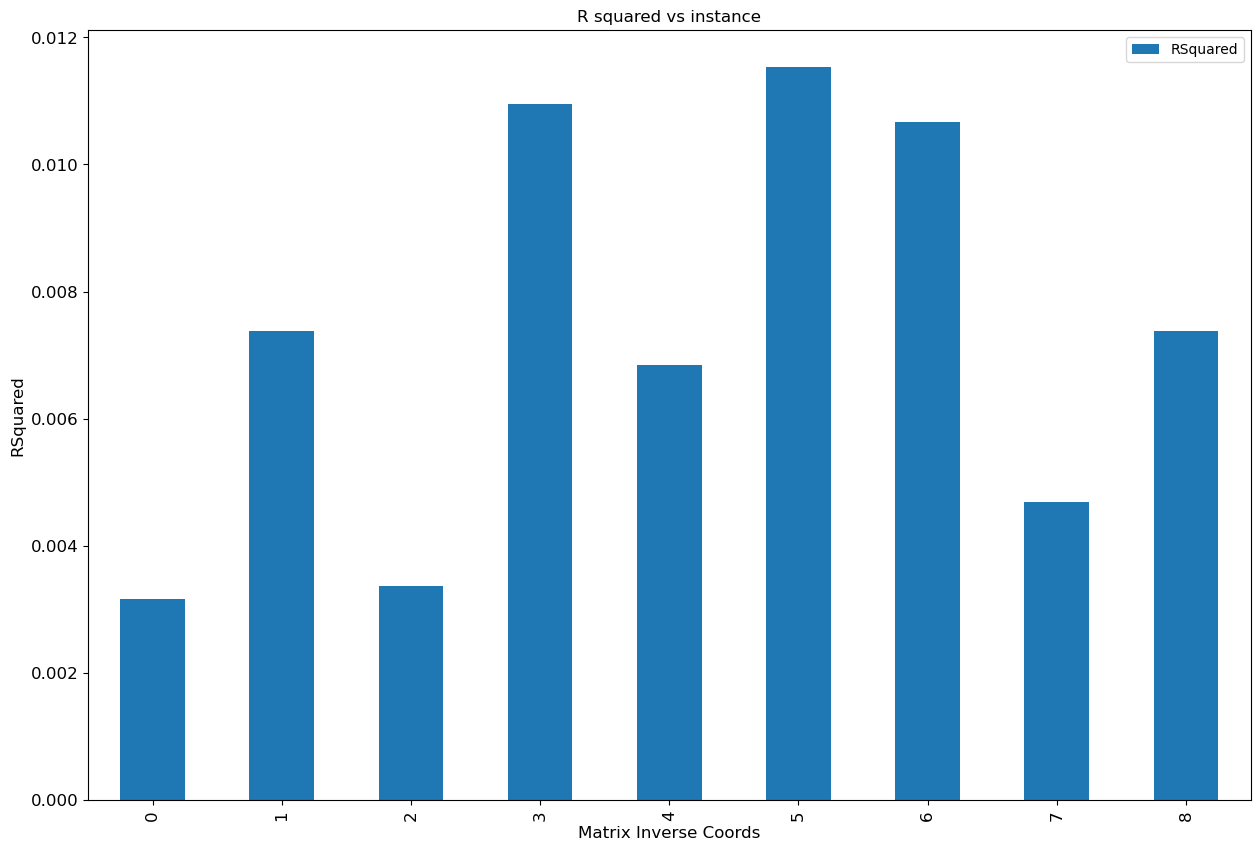

0.0073288863307263575

In [69]:
coords = []
fit = []

dflm2 = dflm.copy()

for i in (0,1,2):
    for j in (0,1,2):
        dfl = dflm2.copy()
        y = dfl['inverse'+str(i)+str(j)]
        dfl.drop('original', axis=1, inplace=True)
        dfl.drop('inverse', axis=1, inplace=True)
        dfl.drop('inverse00', axis=1, inplace=True)
        dfl.drop('inverse01', axis=1, inplace=True)
        dfl.drop('inverse02', axis=1, inplace=True)
        dfl.drop('inverse10', axis=1, inplace=True)
        dfl.drop('inverse11', axis=1, inplace=True)
        dfl.drop('inverse12', axis=1, inplace=True)
        dfl.drop('inverse20', axis=1, inplace=True)
        dfl.drop('inverse21', axis=1, inplace=True)
        dfl.drop('inverse22', axis=1, inplace=True)
        X = dfl[dfl.columns]
        X_withconstant = X
        lm = sm.OLS(y,X_withconstant)
        fit.append([ str(i)+" "+str(j),lm.fit().rsquared])
        
import matplotlib.pyplot as plt
ax = pd.DataFrame(fit, columns=['Matrix Inverse Coords', 'RSquared']).plot(kind='bar', title ="R squared vs instance", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Matrix Inverse Coords", fontsize=12)
ax.set_ylabel("RSquared", fontsize=12)
plt.show()

pd.DataFrame(fit, columns=['Matrix Inverse Coords', 'RSquared']).loc[:, 'RSquared'].mean()

In [70]:
# when adding the combinations of multiplication of two matrix elements to the linear regression the average r squared value 
# increases from 0.0039 to 0.016 which is quite significant

In [71]:
# unfortunately the average r sqaured value is way to low to be able to determine the inverse of a matrix by linear regression

In [72]:
# this is expected although it is a neat result to see how the average r sqaured value significantly increased by adding the 
# combinations of multiplying two matrix elements

In [73]:
# consider linear combinations of multipying all combinations of two items, along with the square of each element in the matrix

dflm = pd.DataFrame(data=invList)
dflm.columns = ['original', 'inverse']

for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['inverse'+str(i)+str(j)] = dflm.apply(lambda row: row['inverse'][i][j], axis=1)

        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original00x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][0][0], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original01x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][0][1], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original02x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][0][2], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original10x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][1][0], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original11x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][1][1], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original12x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][1][2], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original20x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][2][0], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original21x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][2][1], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original22x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][2][2], axis=1)
  

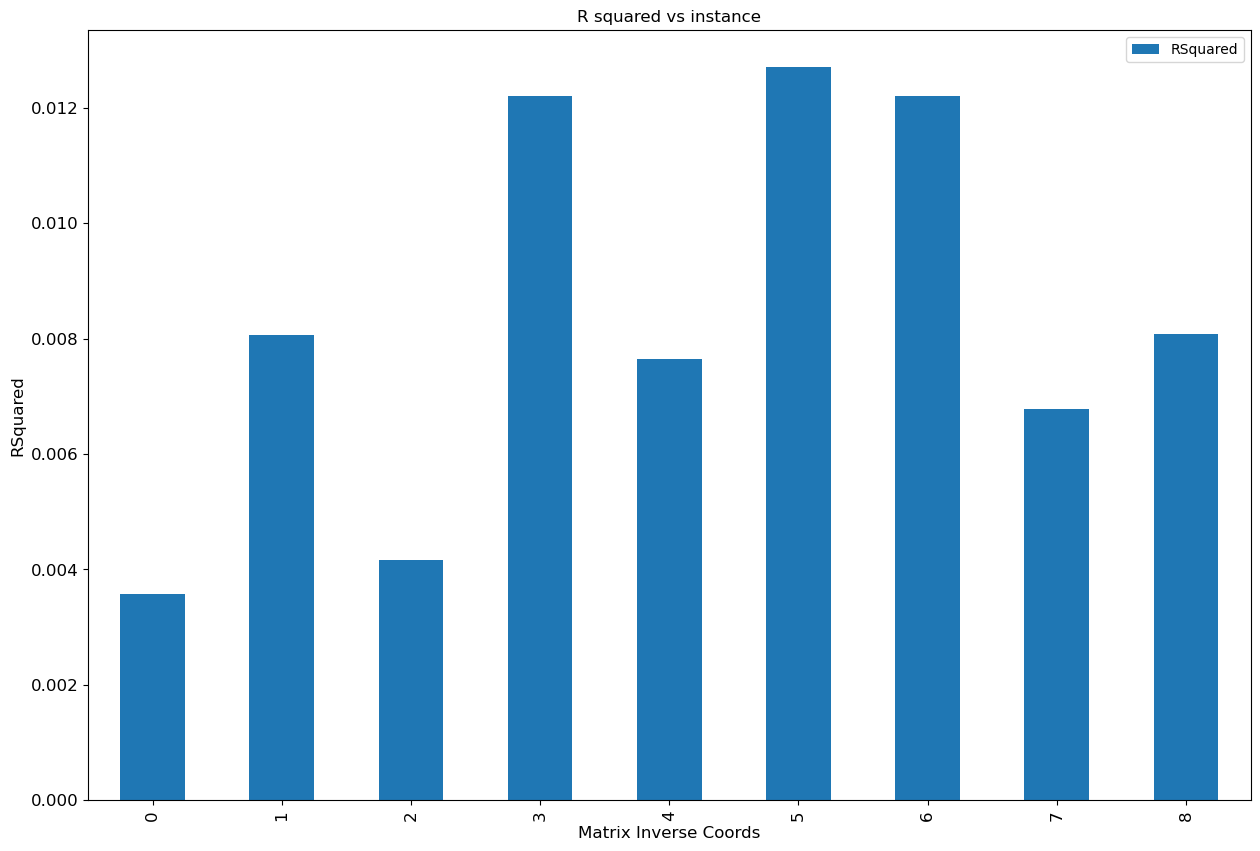

0.008381201102186086

In [74]:
coords = []
fit = []

dflm2 = dflm.copy()

for i in (0,1,2):
    for j in (0,1,2):
        dfl = dflm2.copy()
        y = dfl['inverse'+str(i)+str(j)]
        dfl.drop('original', axis=1, inplace=True)
        dfl.drop('inverse', axis=1, inplace=True)
        dfl.drop('inverse00', axis=1, inplace=True)
        dfl.drop('inverse01', axis=1, inplace=True)
        dfl.drop('inverse02', axis=1, inplace=True)
        dfl.drop('inverse10', axis=1, inplace=True)
        dfl.drop('inverse11', axis=1, inplace=True)
        dfl.drop('inverse12', axis=1, inplace=True)
        dfl.drop('inverse20', axis=1, inplace=True)
        dfl.drop('inverse21', axis=1, inplace=True)
        dfl.drop('inverse22', axis=1, inplace=True)
        X = dfl[dfl.columns]
        X_withconstant = X
        lm = sm.OLS(y,X_withconstant)
        fit.append([ str(i)+" "+str(j),lm.fit().rsquared])
        
import matplotlib.pyplot as plt
ax = pd.DataFrame(fit, columns=['Matrix Inverse Coords', 'RSquared']).plot(kind='bar', title ="R squared vs instance", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Matrix Inverse Coords", fontsize=12)
ax.set_ylabel("RSquared", fontsize=12)
plt.show()

pd.DataFrame(fit, columns=['Matrix Inverse Coords', 'RSquared']).loc[:, 'RSquared'].mean()

In [75]:
#very interesting, the average r squared value increases by 6% when the square of each element to the linear regression

In [76]:
# consider linear combinations of multipying all combinations of two items, along with the square of each element in the matrix

dflm = pd.DataFrame(data=invList)
dflm.columns = ['original', 'inverse']

for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['inverse'+str(i)+str(j)] = dflm.apply(lambda row: row['inverse'][i][j], axis=1)

        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original00x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][0][0] * row['original'][0][0] , axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original01x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][0][1] * row['original'][0][1], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original02x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][0][2] * row['original'][0][2], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original10x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][1][0] * row['original'][1][0], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original11x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][1][1] * row['original'][1][1], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original12x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][1][2] * row['original'][1][2], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original20x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][2][0] * row['original'][2][0], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original21x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][2][1] * row['original'][2][1], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original22x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][2][2] * row['original'][1][2], axis=1)
  

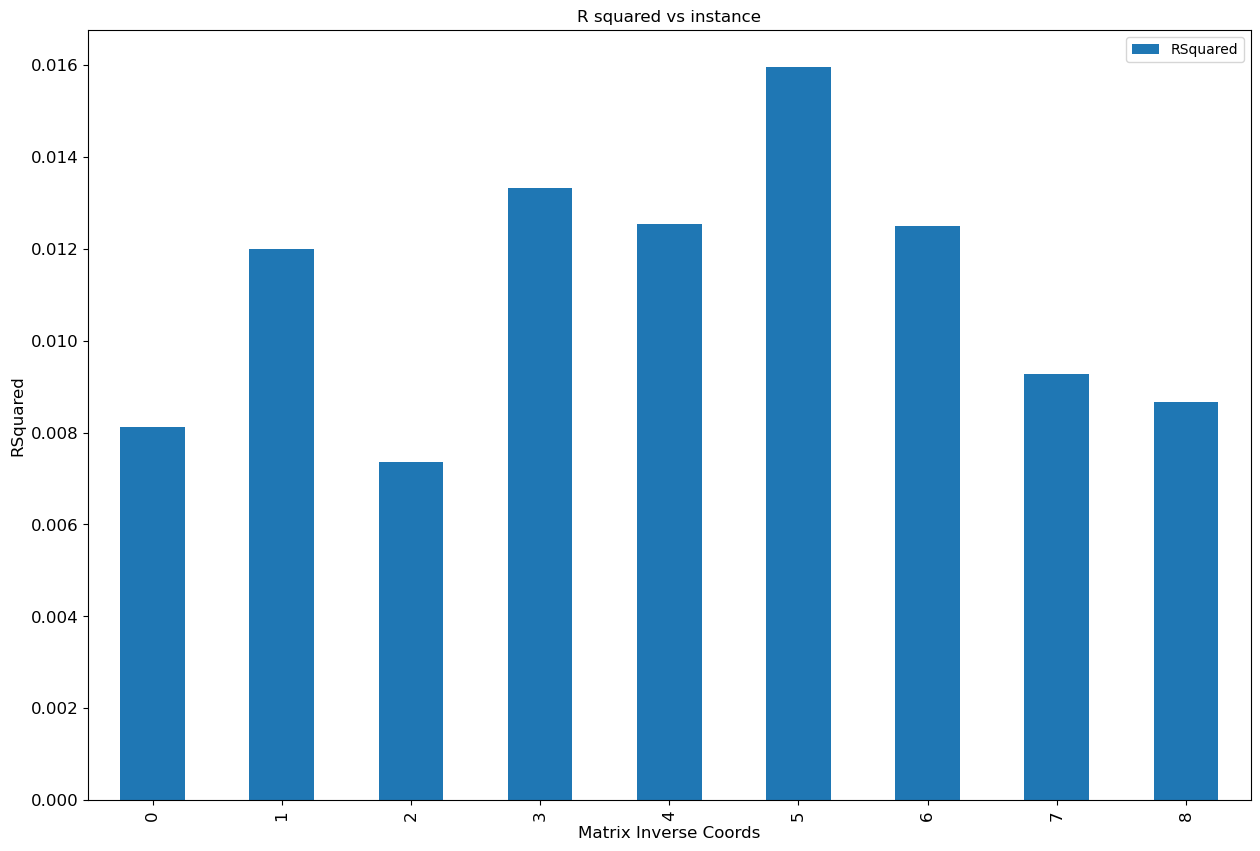

0.01108275328207822

In [77]:
coords = []
fit = []

dflm2 = dflm.copy()

for i in (0,1,2):
    for j in (0,1,2):
        dfl = dflm2.copy()
        y = dfl['inverse'+str(i)+str(j)]
        dfl.drop('original', axis=1, inplace=True)
        dfl.drop('inverse', axis=1, inplace=True)
        dfl.drop('inverse00', axis=1, inplace=True)
        dfl.drop('inverse01', axis=1, inplace=True)
        dfl.drop('inverse02', axis=1, inplace=True)
        dfl.drop('inverse10', axis=1, inplace=True)
        dfl.drop('inverse11', axis=1, inplace=True)
        dfl.drop('inverse12', axis=1, inplace=True)
        dfl.drop('inverse20', axis=1, inplace=True)
        dfl.drop('inverse21', axis=1, inplace=True)
        dfl.drop('inverse22', axis=1, inplace=True)
        X = dfl[dfl.columns]
        X_withconstant = X
        lm = sm.OLS(y,X_withconstant)
        fit.append([ str(i)+" "+str(j),lm.fit().rsquared])
        
import matplotlib.pyplot as plt
ax = pd.DataFrame(fit, columns=['Matrix Inverse Coords', 'RSquared']).plot(kind='bar', title ="R squared vs instance", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Matrix Inverse Coords", fontsize=12)
ax.set_ylabel("RSquared", fontsize=12)
plt.show()

pd.DataFrame(fit, columns=['Matrix Inverse Coords', 'RSquared']).loc[:, 'RSquared'].mean()